In [1]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']
plt.rcParams['text.usetex'] = False
plt.rcParams["ps.usedistiller"] = 'xpdf'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.weight'] = 'normal'

%matplotlib inline

# from plot_utility import mathify_ticklabels

In [2]:
np.random.seed(seed=1)

T = 2
fs = 100;
dt = 1 / fs
n_point = T*fs
A = 1
t = np.linspace(start=0, stop=T, num=n_point, endpoint=True, retstep=[], dtype=None, axis=0)
x_truth = A*np.sin(2*np.pi*t)
dxdt_truth = 2*np.pi*A*np.cos(2*np.pi*t)
noise = np.random.normal(loc=0.0, scale=0.1*A, size=len(x_truth))
x = x_truth + noise

RMS error in velocity:  6.650160235325943


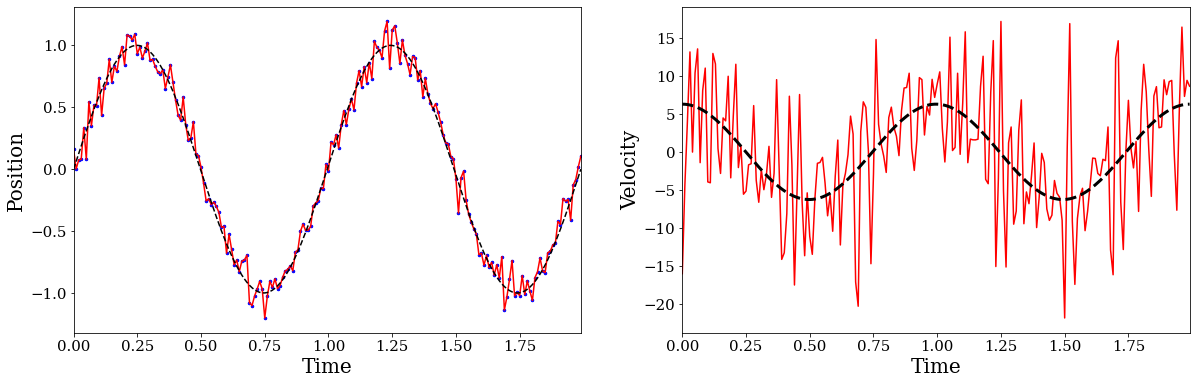

In [3]:
# fig = plt.figure(figsize=(8,3))
# ax = fig.add_subplot(111)
# ax.plot(t, x, '-',
#         color='red', 
#         marker='.',
#         markerfacecolor='blue',
#         markeredgecolor='none',
#         markersize=10, alpha=0.8,
#         linewidth=2)
# ax.plot(t, x_truth, '-',
#         color='black',
#         linewidth=4)

# ax.set_xlabel('Time (s)')
# ax.set_ylabel('X')
# plt.show()

x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

In [ ]:
noise_type = 'normal'
noise_parameters = [0, 0.1]  # mean and std

# time step size and time series length in TIME
dt = 0.01
timeseries_length = 4
# simulate data

x, x_truth, dxdt_truth, _ = simulate.pi_control(dt=dt, timeseries_length=timeseries_length, 
                                                noise_type=noise_type, noise_parameters=noise_parameters)

RMS error in velocity:  6.820305856536254


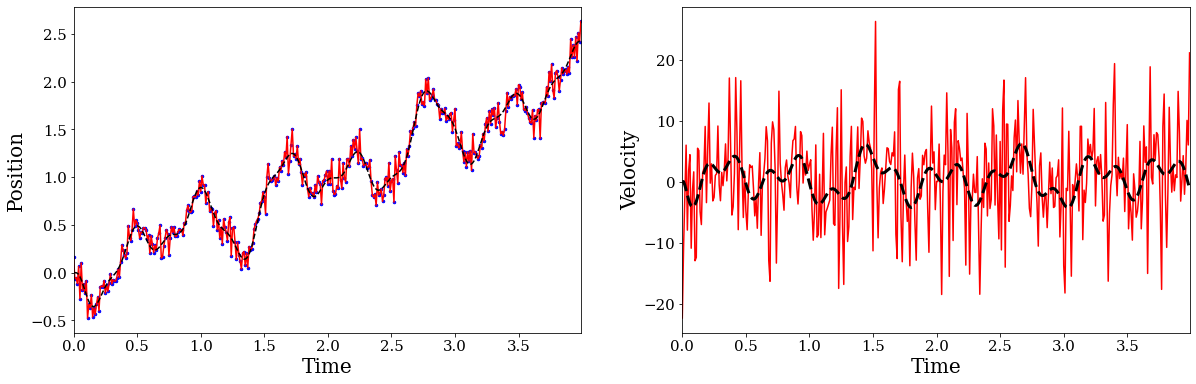

In [53]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)